In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, spearmanr

%matplotlib inline

In [240]:
data = pd.read_csv('Data_5-30-2022.csv')
data.index = data['Institution Name']

data2020 = data[[col for col in data.columns if '2020' in col]]

data2020.columns = [ col.replace("Grand total (C2020_A ", "")\
                        .replace("  Bachelor's degree)",  "")\
                        .replace(" First major  ",        "")  for col in data2020.columns]

#normalize by total graduates
data2020 = data2020.apply(lambda x: round((x/x['Grand total'])*100, 2),axis=1)

majors = data2020.columns

rankings = pd.read_excel('US Higher Education_ Value vs. Vulnerability.xlsx', skiprows=5)
rankings = rankings[rankings["Ranking List"]=="USN National College Ranking"]
rankings = rankings[["Institution Name", "Rank"]]

pearsons = []
spearmans = []

for i, major in enumerate(majors): 

    cs = [col for col in data2020.columns if col==major]
    csdata = data2020[cs].dropna()
    csdata = csdata[csdata[cs]>0]
    merged = pd.merge(rankings, csdata, left_on="Institution Name", right_index=True)

    furman = merged[merged['Institution Name']=='Furman University']
    
    major = cs[0]
    filtered = merged.dropna()
    
    if len(filtered)>1:
        results = pearsonr(filtered["Rank"], filtered[major])
        pearsons.append((major, results[0], results[1]));
        
        results = spearmanr(filtered["Rank"], filtered[major])
        spearmans.append((major, results[0], results[1]));
        
        plt.figure()
        top = filtered.iloc[filtered[major].argmax()]
        plt.title("Top: %s (Rank: %s)" % (top['Institution Name'], top['Rank']));

        plt.scatter(filtered["Rank"], filtered[cs]);
        plt.scatter(furman["Rank"], furman[cs]);

        plt.xlabel("Rank");
        plt.ylabel("%s\nGraduates" % cs[0]);
        plt.legend(['Others', 'Furman']);
        plt.savefig('out/%s' % major.replace("/", "_"))
        plt.close()

/Users/fahadsultan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/fahadsultan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [241]:
corrs_df = pd.DataFrame(pearsons)
corrs_df.columns = ['major', 'r', 'pval']

final_results = corrs_df[corrs_df['pval']<(0.001/len(corrs_df))].sort_values('r')

In [242]:
final_results

,major,r,pval
25,Social Sciences,-0.684243,1.098429e-19
6,Computer and Information Sciences and Support ...,-0.511734,2.715509e-09
4,Area Ethnic Cultural Gender and Group Studies,-0.491227,7.653240e-07
16,Mathematics and Statistics,-0.461217,2.955916e-08
10,Foreign Languages Literatures and Linguistics,-0.391167,9.153340e-06
28,Business Management Marketing and Related S...,0.453038,5.771853e-06
7,Education,0.471917,7.615692e-06


In [243]:
corrs_df = pd.DataFrame(spearmans)
corrs_df.columns = ['major', 'r', 'pval']

final_results = corrs_df[corrs_df['pval']<(0.001/len(corrs_df))].sort_values('r')

In [244]:
final_results

,major,r,pval
25,Social Sciences,-0.673612,6.444726e-19
6,Computer and Information Sciences and Support ...,-0.513773,2.291601e-09
4,Area Ethnic Cultural Gender and Group Studies,-0.474136,2.059487e-06
10,Foreign Languages Literatures and Linguistics,-0.445872,2.972523e-07
16,Mathematics and Statistics,-0.436306,1.895011e-07
19,Philosophy and Religious Studies,-0.427576,5.925857e-07
21,Physical Sciences,-0.374855,1.027809e-05
7,Education,0.486384,3.607043e-06


# Major Distributions

In [363]:
top50 = rankings[rankings['Rank']<=100].sort_values('Rank')

In [365]:
data2020 = data2020.fillna(0)

In [366]:
for idx, row in top50.iterrows():
    name, rank = row['Institution Name'], row['Rank']
    if name not in data2020.index:
        print(name)
        continue
    majors = data2020.loc[name]
    if type(data2020.loc[name])!=pd.Series:
        majors = majors.iloc[0]
    if 'Grand total' in majors.index:
        majors = majors.drop('Grand total')
#     majors = majors.dropna()
#     majors = majors.sort_values()
    majors = majors.loc[ordered[::-1]]
    plt.figure(figsize=(15, 10))
    barlist = list(plt.barh(majors.index, majors.values))
    [x.set_color('g') for x in barlist[:-12]]
    [x.set_color('orange') for x in barlist[-12:-8]]
    [x.set_color('b') for x in barlist[-8:-5]]
    [x.set_color('r') for x in barlist[-5:]]
    barlist[-1].set_color('black');
    plt.xlim(0, 30);
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.title(name);
    plt.tight_layout()
    plt.grid(axis='x')
    plt.savefig('out/majors_distribution/%s_%s.png' % (rank, name));
    plt.close()
#     break

Middlebury College
Washington and Lee University
Smith College
Wesleyan University
University of Richmond
Bryn Mawr College
Sewanee - The University of the South
Bard College
St. John's College - MD
Willamette University
St. John's College - NM
Lewis & Clark College
University of Puget Sound


In [331]:
ordered = [
'Social Sciences',
'Biological and Biomedical Sciences',
'Health Professions and Related Programs',
'Physical Sciences',
'Psychology',
'Computer and Information Sciences and Support Services',
'Mathematics and Statistics',
'Engineering',
'Business  Management  Marketing  and Related Support Services',
'Communication  Journalism  and Related Programs',
'Education',
'History',
'English Language and Literature/Letters',
'Foreign Languages  Literatures  and Linguistics',
'Area  Ethnic  Cultural  Gender  and Group Studies',
'Philosophy and Religious Studies', 
'Visual and Performing Arts',
'Theology and Religious Vocations', 
'Liberal Arts and Sciences  General Studies and Humanities',
'Parks  Recreation  Leisure  Fitness  and Kinesiology',
'Homeland Security  Law Enforcement  Firefighting and Related Protective Services',
'Multi/Interdisciplinary Studies',
'Public Administration and Social Service Professions',
'Natural Resources and Conservation',
'Architecture and Related Services',
'Agricultural/Animal/Plant/Veterinary Science and Related Fields',
'Family and Consumer Sciences/Human Sciences',
'Engineering/Engineering-related Technologies/Technicians',
'Communications Technologies/Technicians and Support Services',
'Transportation and Materials Moving',
'Legal Professions and Studies',
'Military Technologies and Applied Sciences',
'Culinary  Entertainment  and Personal Services',
'Precision Production',
'Mechanic and Repair Technologies/Technicians',
'Library Science',
'Science Technologies/Technicians',
'Construction Trades']

In [333]:
majors = data2020.loc[name]

# With Scoreboard Data

In [3]:
data = pd.read_csv('../data/Most-Recent-Cohorts-Institution.csv')

/Users/fahadsultan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,9,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,6

In [8]:
liberal_arts = data[(data['PREDDEG']==3) & (data['CONTROL']==2)]

In [16]:
dept_cols   = [col for col in liberal_arts.columns if col.startswith('PCIP')]
departments = liberal_arts[['INSTNM']+dept_cols]

In [12]:
rankings = pd.read_excel('../data/US Higher Education_ Value vs. Vulnerability.xlsx', skiprows=5)
rankings = rankings[rankings["Ranking List"]=="USN National College Ranking"]
rankings = rankings[["Institution Name", "Rank"]]

In [14]:
merged = pd.merge(departments, rankings, left_on='INSTNM', right_on='Institution Name')

In [21]:
merged = merged.set_index('INSTNM')
del merged['Institution Name']

In [31]:
from sklearn.decomposition import PCA
import seaborn as sns

[0.01767965 0.00891208]


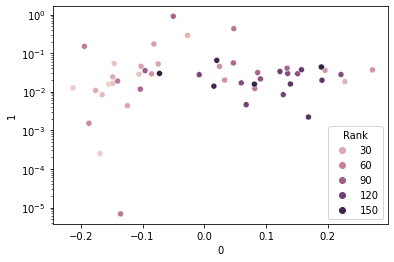

In [50]:
pca = PCA(n_components=2)
result = pca.fit_transform(merged[dept_cols])

result = pd.DataFrame(result)
result['Rank'] = merged['Rank'].values
sns.scatterplot(data=result, x=0, y=1, hue='Rank')
plt.yscale('log')
print(pca.explained_variance_)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
clf = LinearRegression()
clf.fit(merged[dept_cols], merged['Rank'])

LinearRegression()

In [65]:
clf.coef_

array([-1.38022612e+04, -1.45476487e+04, -1.42090688e+04, -1.49942116e+04,
       -1.44815631e+04, -1.56432709e+04, -1.47752159e+04,  5.17502485e-10,
       -1.43900236e+04, -1.45262623e+04, -1.55886312e+04, -1.47974463e+04,
       -1.44363474e+04, -1.50463728e+04, -1.45255670e+04, -1.45338309e+04,
       -6.54836185e-11, -1.44254994e+04, -1.47910740e+04, -1.45519152e-11,
       -1.45130494e+04, -1.44035814e+04, -1.42053886e+04, -1.44476932e+04,
       -1.46170456e+04, -9.09494702e-12, -1.42597403e+04, -1.43906511e+04,
       -1.41384546e+04, -1.46472249e+04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.31406296e+04, -1.44508238e+04, -1.46171444e+04,
       -1.44252943e+04, -1.44288800e+04])

In [61]:
merged[dept_cols].columns[clf.coef_.argsort()]

Index(['PCIP10', 'PCIP15', 'PCIP22', 'PCIP05', 'PCIP16', 'PCIP27', 'PCIP11',
       'PCIP45', 'PCIP51', 'PCIP40', 'PCIP03', 'PCIP24', 'PCIP14', 'PCIP23',
       'PCIP30', 'PCIP09', 'PCIP50', 'PCIP39', 'PCIP19', 'PCIP54', 'PCIP26',
       'PCIP52', 'PCIP31', 'PCIP43', 'PCIP13', 'PCIP42', 'PCIP04', 'PCIP38',
       'PCIP44', 'PCIP01', 'PCIP49', 'PCIP25', 'PCIP29', 'PCIP41', 'PCIP46',
       'PCIP47', 'PCIP48', 'PCIP12'],
      dtype='object')

In [70]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [72]:
result = pd.DataFrame(squareform(pdist(merged[dept_cols])))

In [73]:
result.columns = merged.index
result.index = merged.index

In [77]:
result.loc['Furman University'].sort_values()[:20]

INSTNM
Furman University            0.000000
Gustavus Adolphus College    0.140416
Wheaton College              0.146428
Wheaton College              0.146428
Austin College               0.156720
Saint Mary's College         0.158674
Saint Anselm College         0.159468
College of Saint Benedict    0.163825
Coe College                  0.176037
Denison University           0.176815
University of Puget Sound    0.177356
Luther College               0.177562
DePauw University            0.179409
Berea College                0.182151
Ripon College                0.184693
Goucher College              0.185973
Albion College               0.188070
Saint Vincent College        0.191359
Hope College                 0.192290
Randolph College             0.193131
Name: Furman University, dtype: float64

In [78]:
from sklearn.manifold import TSNE

In [85]:
tsne = TSNE()
reduced = pd.DataFrame(tsne.fit_transform(merged[dept_cols]))
reduced['Rank'] = merged['Rank'].values
reduced.index = merged.index

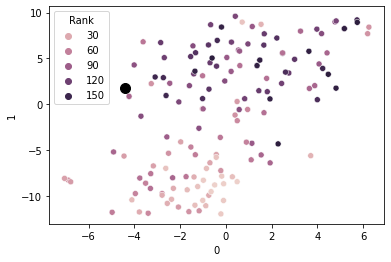

In [86]:
sns.scatterplot(data=reduced, x=0, y=1, hue='Rank')

furman = reduced.loc['Furman University']
plt.scatter(furman[0], furman[1], color='black', s=100)